<a href="https://colab.research.google.com/github/kaseywoo1240/machine_learning_classification_kyphosis/blob/main/Decision_Trees_for_Kyphosis_Disease_Classification_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CODE TO CLASSIFY KYPHOSIS DISEASE USING DECISION TREES AND RANDOM FOREST CLASSIFIER
# Dr. Ryan @STEMplicity


# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

# STEP #0: LIBRARIES IMPORT


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [ ]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [ ]:
kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [ ]:
kyphosis_df.tail(5)

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [ ]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


# STEP #2: VISUALIZE DATASET

<Axes: xlabel='Kyphosis', ylabel='count'>

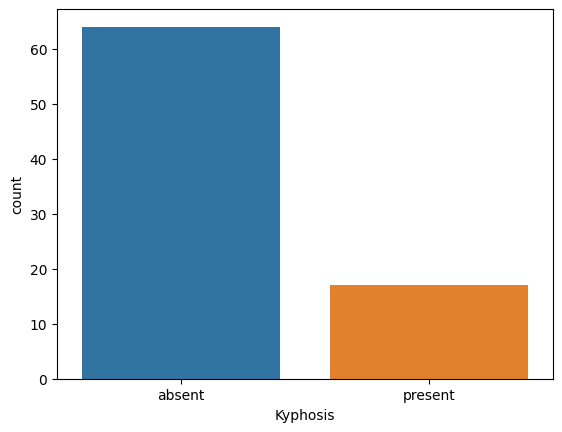

In [ ]:
sns.countplot(x = 'Kyphosis', data = kyphosis_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [ ]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis'] == 1]

In [ ]:
kyphosis_True

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12
24,1,15,7,2
37,1,52,5,6
39,1,91,5,12
40,1,73,5,1
45,1,139,3,10


In [ ]:
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis'] == 0]

In [ ]:
kyphosis_False

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16
...,...,...,...,...
74,0,11,3,15
75,0,178,4,15
77,0,26,7,13
78,0,120,2,13


In [ ]:
print('Disease present after operation percentage =', 100.0* (len(kyphosis_True) / len(kyphosis_df)), '%')

Disease present after operation percentage = 20.98765432098765 %


In [ ]:
print('Disease absent after operation percentage =', 100.0* (len(kyphosis_False) / len(kyphosis_df)), '%')

Disease absent after operation percentage = 79.01234567901234 %


<Axes: >

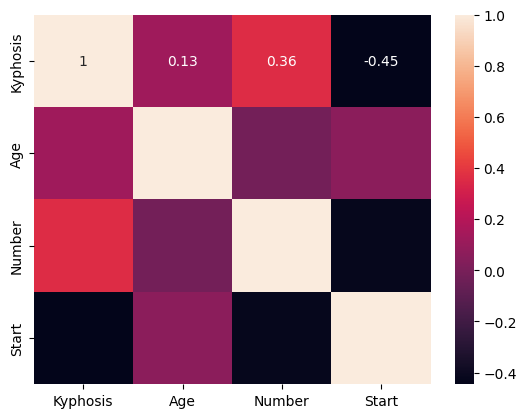

In [ ]:
sns.heatmap(kyphosis_df.corr(), annot = True)

C:\Users\kasey.woo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kasey.woo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kasey.woo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


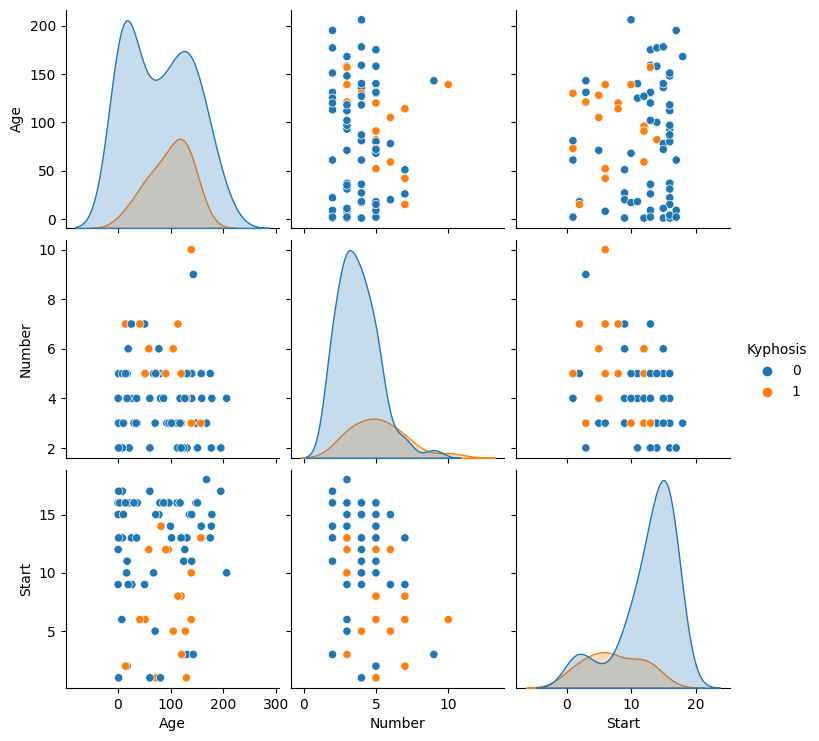

In [ ]:
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [ ]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
X = kyphosis_df.drop('Kyphosis', axis = 1)
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [ ]:
y = kyphosis_df['Kyphosis']
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STEP#4: TRAINING THE MODEL

In [ ]:
X_train.shape

(64, 3)

In [ ]:
y_train.shape

(64,)

In [ ]:
X_test.shape

(17, 3)

In [ ]:
y_test.shape

(17,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index = X_train.columns, columns = ['importance'])

In [ ]:
feature_importance

,importance
Age,0.444082
Number,0.239891
Start,0.316027


# STEP#5: EVALUATING THE MODEL

In [ ]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

In [ ]:
feature_importance

,importance
Age,0.444082
Start,0.316027
Number,0.239891


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_predict_train = decision_tree.predict(X_train)

In [ ]:
y_predict_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_train, y_predict_train)

<Axes: >

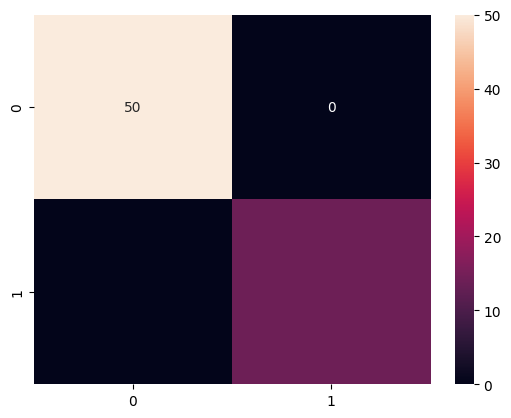

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
y_predict_test = decision_tree.predict(X_test)

In [ ]:
y_predict_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

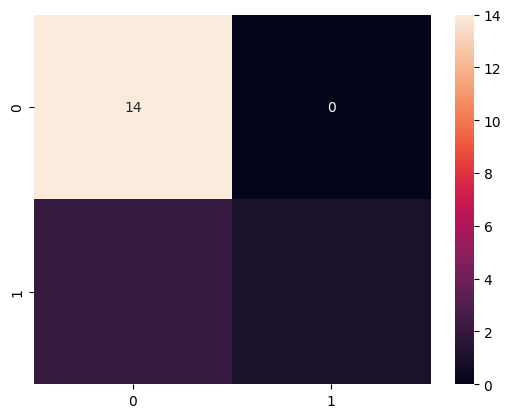

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.33      0.50         3

    accuracy                           0.88        17
   macro avg       0.94      0.67      0.72        17
weighted avg       0.90      0.88      0.86        17



# STEP#6: IMPROVING THE MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
y_predict_train = RandomForest.predict(X_train)

In [ ]:
cm = confusion_matrix(y_train, y_predict_train)

<Axes: >

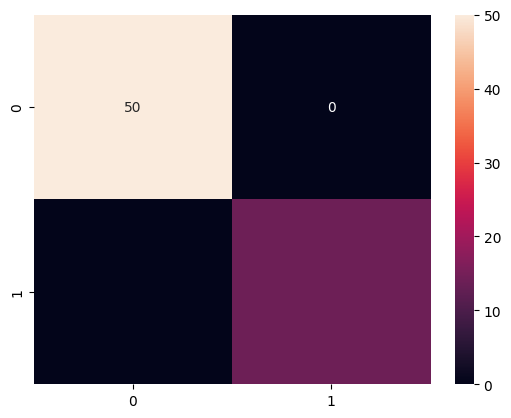

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
y_predict_test = RandomForest.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict_test)

<Axes: >

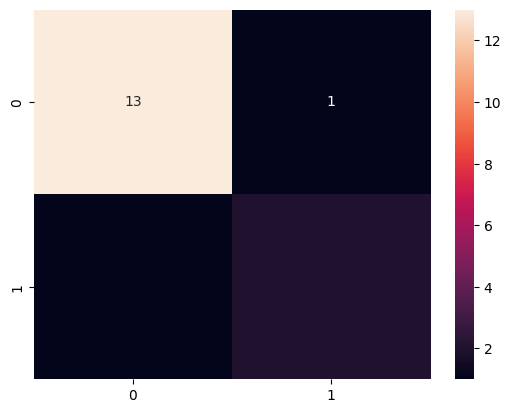

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.67      0.67      0.67         3

    accuracy                           0.88        17
   macro avg       0.80      0.80      0.80        17
weighted avg       0.88      0.88      0.88        17



# EXCELLENT JOB!